In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('C:/Users/PRESTIGE PC/Pictures/CAS/supermarket_sales - Sheet1.csv')

In [4]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [5]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [6]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [7]:
"""Checking the number of unique values in each column"""
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index =['unique count']).transpose()

unique count
Invoice ID                       1000
Branch                              3
City                                3
Customer type                       2
Gender                              2
Product line                        6
Unit price                        943
Quantity                           10
Tax 5%                            990
Total                             990
Date                               89
Time                              506
Payment                             3
cogs                              990
gross margin percentage             1
gross income                      990
Rating                             61

In [8]:
df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [9]:
df2 = df.copy()

In [10]:
df2.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [11]:
# temp = []
# for i,item in enumerate(label_encoder.classes_):
#     print(item, '--->', i)
#     temp.append(i)

In [12]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [13]:
# select all categorical types
cat = df2.select_dtypes(include=['object']).copy()

In [14]:
cat

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line       Date   Time      Payment  
0         Health and beauty   1/5/2019  13:08      Ewallet  
1    Electronic accessories   3/8/2019  10:29         Cash  
2        Home and lifestyle   3/3/2019  13:23  Credit card  
3         Health and beauty  1/27/2019  20:33      Ewallet  
4         Sports and travel   2/8/2019  10:37      Ewallet  
..                      ...        ...    ...          ...  
995       Health and beauty  1/29/2019  13:46      Ewallet  
996      Home and lifestyle   3/2/2019  17:16      Ewallet  
997      Food and beverages   2/9/2019  13:22         Cash  
998      Home and lifestyle  2/22/2019  15:33         Cash  
999     Fashion accessories  2/18/2019  13:28         Cash  

[1000 rows x 9 columns]

In [15]:
# Label encoding
cat_df1 = cat.drop(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment'], axis=1)

In [16]:
cat_df1.head()

Invoice ID
0  750-67-8428
1  226-31-3081
2  631-41-3108
3  123-19-1176
4  373-73-7910

In [17]:
#Detect missing values
cat_df1.isna()

Invoice ID
0         False
1         False
2         False
3         False
4         False
..          ...
995       False
996       False
997       False
998       False
999       False

[1000 rows x 1 columns]

In [18]:
# convert to categorical type
cat_df1['Invoice ID'] = cat_df1['Invoice ID'].astype('category')

In [19]:
# check the type
cat_df1.dtypes

Invoice ID    category
dtype: object

In [20]:
# create the category encoding
cat_df1['Invoice ID'] = cat_df1['Invoice ID'].cat.codes

In [21]:
cat['Invoice ID'] = cat_df1['Invoice ID']

In [22]:
cat_df2 = cat.drop(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment'], axis=1)

In [23]:
cat_df2

Branch
0        A
1        C
2        A
3        A
4        A
..     ...
995      C
996      B
997      A
998      A
999      A

[1000 rows x 1 columns]

In [24]:
cat_df2.value_counts()

Branch
A         340
B         332
C         328
dtype: int64

In [25]:
cat_df2['Branch'] = cat_df2['Branch'].astype('category')

In [26]:
# checking the type for confirmation
cat_df2.dtypes

Branch    category
dtype: object

In [27]:
# encoding
cat_df2['Branch'] = cat_df2['Branch'].cat.codes

In [28]:
cat_df2['Branch']

0      0
1      2
2      0
3      0
4      0
      ..
995    2
996    1
997    0
998    0
999    0
Name: Branch, Length: 1000, dtype: int8

In [29]:
cat['Branch'] = cat_df2['Branch']

In [30]:
# Encoding the City
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment'], axis=1)
cat_df3['City'] = cat_df3['City'].astype('category')
cat_df3['City'] = cat_df3['City'].cat.codes
cat['City'] = cat_df3['City']

In [31]:
# Encoding the customer type
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'City', 'Gender', 'Product line', 'Date', 'Time', 'Payment'], axis=1)
cat_df3['Customer type'] = cat_df3['Customer type'].astype('category')
cat_df3['Customer type'] = cat_df3['Customer type'].cat.codes
cat['Customer type'] = cat_df3['Customer type']

In [32]:
# Encoding the Gender
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'City', 'Product line', 'Date', 'Time', 'Payment'], axis=1)
cat_df3['Gender'] = cat_df3['Gender'].astype('category')
cat_df3['Gender'] = cat_df3['Gender'].cat.codes
cat['Gender'] = cat_df3['Gender']

In [33]:
# Encoding the Product line
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'City', 'Date', 'Time', 'Payment'], axis=1)
cat_df3['Product line'] = cat_df3['Product line'].astype('category')
cat_df3['Product line'] = cat_df3['Product line'].cat.codes
cat['Product line'] = cat_df3['Product line']

In [34]:
# Encoding the Date
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'Product line', 'City', 'Time', 'Payment'], axis=1)
cat_df3['Date'] = cat_df3['Date'].astype('category')
cat_df3['Date'] = cat_df3['Date'].cat.codes
cat['Date'] = cat_df3['Date']

In [35]:
# Encoding the Time
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'Product line', 'Date', 'City', 'Payment'], axis=1)
cat_df3['Time'] = cat_df3['Time'].astype('category')
cat_df3['Time'] = cat_df3['Time'].cat.codes
cat['Time'] = cat_df3['Time']

In [36]:
# Encoding the Payment
cat_df3 = cat.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'City'], axis=1)
cat_df3['Payment'] = cat_df3['Payment'].astype('category')
cat_df3['Payment'] = cat_df3['Payment'].cat.codes
cat['Payment'] = cat_df3['Payment']
# pay = df['Payment']
# check = pd.concat([cat_df3['Payment'], pay], axis = 1)

In [37]:
# check.head(10)

In [38]:
cat.head(2)

Invoice ID  Branch  City  Customer type  Gender  Product line  Date  Time  \
0         814       0     2              0       0             3    26   146   
1         142       2     1              1       0             0    87    23   

   Payment  
0        2  
1        0

In [39]:
df2 = df2.drop('Payment', axis = 1)
df2 = df2.drop(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time'], axis = 1)

In [40]:
df2 = pd.concat([df2, cat], axis = 1)

In [41]:
df2.head(20)

Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0        74.69         7  26.1415  548.9715  522.83                 4.761905   
1        15.28         5   3.8200   80.2200   76.40                 4.761905   
2        46.33         7  16.2155  340.5255  324.31                 4.761905   
3        58.22         8  23.2880  489.0480  465.76                 4.761905   
4        86.31         7  30.2085  634.3785  604.17                 4.761905   
5        85.39         7  29.8865  627.6165  597.73                 4.761905   
6        68.84         6  20.6520  433.6920  413.04                 4.761905   
7        73.56        10  36.7800  772.3800  735.60                 4.761905   
8        36.26         2   3.6260   76.1460   72.52                 4.761905   
9        54.84         3   8.2260  172.7460  164.52                 4.761905   
10       14.48         4   2.8960   60.8160   57.92                 4.761905   
11       25.51         4   5.1020  107.1420  102.04                 4.761905   
12       46.95         5  11.7375  246.4875  234.75                 4.761905   
13       43.19        10  21.5950  453.4950  431.90                 4.761905   
14       71.38        10  35.6900  749.4900  713.80                 4.761905   
15       93.72         6  28.1160  590.4360  562.32                 4.761905   
16       68.93         7  24.1255  506.6355  482.51                 4.761905   
17       72.61         6  21.7830  457.4430  435.66                 4.761905   
18       54.67         3   8.2005  172.2105  164.01                 4.761905   
19       40.30         2   4.0300   84.6300   80.60                 4.761905   

    gross income  Rating  Invoice ID  Branch  City  Customer type  Gender  \
0        26.1415     9.1         814       0     2              0       0   
1         3.8200     9.6         142       2     1              1       0   
2        16.2155     7.4         653       0     2              1       1   
3        23.2880     8.4          18       0     2              0       1   
4        30.2085     5.3         339       0     2              1       1   
5        29.8865     4.1         733       2     1              1       1   
6        20.6520     5.8         315       0     2              0       0   
7        36.7800     8.0         264       2     1              1       0   
8         3.6260     7.2         702       0     2              0       0   
9         8.2260     5.9         726       1     0              0       0   
10        2.8960     4.5         311       1     0              0       0   
11        5.1020     6.8         517       1     0              0       1   
12       11.7375     7.1         327       0     2              1       0   
13       21.5950     8.2         182       0     2              1       1   
14       35.6900     5.7         902       0     2              1       0   
15       28.1160     4.5         245       1     0              0       0   
16       24.1255     4.6         693       0     2              0       0   
17       21.7830     6.9         831       0     2              1       1   
18        8.2005     8.6         287       0     2              1       1   
19        4.0300     4.4         272       1     0              1       0   

    Product line  Date  Time  Payment  
0              3    26   146        2  
1              0    87    23        0  
2              4    81   155        1  
3              3    19   485        2  
4              5    57    29        2  
5              0    76   393        2  
6              0    48   214        2  
7              4    47    77        2  
8              3     1   341        1  
9              2    43   159        1  
10             1    55   377        2  
11             0    88   332        0  
12             0    34    20        2  
13             2    56   320        2  
14             3    80   430        0  
15             5     6   296        0  
16             3    61   

In [42]:
df2.tail(20)

Unit price  Quantity   Tax 5%      Total    cogs  \
980       59.59         4  11.9180   250.2780  238.36   
981       58.15         4  11.6300   244.2300  232.60   
982       97.48         9  43.8660   921.1860  877.32   
983       99.96         7  34.9860   734.7060  699.72   
984       96.37         7  33.7295   708.3195  674.59   
985       63.71         5  15.9275   334.4775  318.55   
986       14.76         2   1.4760    30.9960   29.52   
987       62.00         8  24.8000   520.8000  496.00   
988       82.34        10  41.1700   864.5700  823.40   
989       75.37         8  30.1480   633.1080  602.96   
990       56.56         5  14.1400   296.9400  282.80   
991       76.60        10  38.3000   804.3000  766.00   
992       58.03         2   5.8030   121.8630  116.06   
993       17.49        10   8.7450   183.6450  174.90   
994       60.95         1   3.0475    63.9975   60.95   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  gross income  Rating  Invoice ID  Branch  City  \
980                 4.761905       11.9180     9.8         771       2     1   
981                 4.761905       11.6300     8.4         881       0     2   
982                 4.761905       43.8660     7.4          42       0     2   
983                 4.761905       34.9860     6.1          49       2     1   
984                 4.761905       33.7295     6.0         100       2     1   
985                 4.761905       15.9275     8.5         342       1     0   
986                 4.761905        1.4760     4.3         830       1     0   
987                 4.761905       24.8000     6.2         548       1     0   
988                 4.761905       41.1700     4.3         198       2     1   
989                 4.761905       30.1480     8.4         409       1     0   
990                 4.761905       14.1400     4.5         986       0     2   
991                 4.761905       38.3000     6.0         621       1     0   
992                 4.761905        5.8030     8.8         803       0     2   
993                 4.761905        8.7450     6.6         724       1     0   
994                 4.761905        3.0475     5.9         689       2     1   
995                 4.761905        2.0175     6.2         153       2     1   
996                 4.761905       48.6900     4.4         250       1     0   
997                 4.761905        1.5920     7.7         767       0     2   
998                 4.761905        3.2910     4.1         308       0     2   
999                 4.761905       30.9190     6.6         935       0     2   

     Customer type  Gender  Product line  Date  Time  Payment  
980              0       1             2    10   130        0  
981              1       1             3    15   357        0  
982              0       0             5    64   200        2  
983              1       1             3    15    26        0  
984              1       1             0    30    79        0  
985              1       0             1    56   437        2  
986              1       0             3    40   218        2  
987              0       1             3    22   420        1  
988              0       1             0    80   423        2  
989              0       1             3    20   271        1  
990              1       0             2    73   418        1  
991              1       0             5    16   380        2  
992              1       1             0    60   496        2  
993              1       1             1    45   396        2  
994              0       0             0    40    79        2  
995              1       1             3    21   174        2  
996              1       0            

In [43]:
# Feature engineering has been done by using label encoding

In [44]:
"""Checking the number of unique values in each column"""
dict = {}
for i in list(df2.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index =['unique count']).transpose()

unique count
Unit price                        943
Quantity                           10
Tax 5%                            990
Total                             990
cogs                              990
gross margin percentage             1
gross income                      990
Rating                             61
Invoice ID                       1000
Branch                              3
City                                3
Customer type                       2
Gender                              2
Product line                        6
Date                               89
Time                              506
Payment                             3

In [45]:
df2.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   
Invoice ID                -0.009213  0.024977  0.027277  0.027277  0.027277   
Branch                     0.028202  0.015964  0.041047  0.041047  0.041047   
City                      -0.013763 -0.002121 -0.012812 -0.012812 -0.012812   
Customer type             -0.020238 -0.016763 -0.019670 -0.019670 -0.019670   
Gender                     0.015445 -0.074258 -0.049451 -0.049451 -0.049451   
Product line               0.019321  0.020256  0.031621  0.031621  0.031621   
Date                      -0.033470 -0.013842 -0.025537 -0.025537 -0.025537   
Time                       0.008155 -0.009045 -0.005298 -0.005298 -0.005298   
Payment                   -0.015941 -0.003921 -0.012434 -0.012434 -0.012434   

                         gross margin percentage  gross income    Rating  \
Unit price                                   NaN      0.633962 -0.008778   
Quantity                                     NaN      0.705510 -0.015815   
Tax 5%                                       NaN      1.000000 -0.036442   
Total                                        NaN      1.000000 -0.036442   
cogs                                         NaN      1.000000 -0.036442   
gross margin percentage                      NaN           NaN       NaN   
gross income                                 NaN      1.000000 -0.036442   
Rating                                       NaN     -0.036442  1.000000   
Invoice ID                                   NaN      0.027277 -0.003787   
Branch                                       NaN      0.041047  0.010238   
City                                         NaN     -0.012812  0.049585   
Customer type                                NaN     -0.019670  0.018889   
Gender                                       NaN     -0.049451  0.004800   
Product line                                 NaN      0.031621 -0.020529   
Date                                         NaN     -0.025537 -0.017183   
Time                                         NaN     -0.005298 -0.026223   
Payment                                      NaN     -0.012434 -0.005381   

                         Invoice ID    Branch      City  Customer type  \
Unit price                -0.009213  0.028202 -0.013763      -0.020238   
Quantity                   0.024977  0.015964 -0.002121      -0.016763   
Tax 5%                     0.027277  0.041047 -0.012812      -0.019670   
Total                      0.027277  0.041047 -0.012812      -0.019670   
cogs                       0.027277  0.041047 -0.012812      -0.019670   
gross margin percentage         NaN       NaN       NaN            NaN   
gross income               0.027277  0.041047 -0.012812      -0.019670   
Rating                    -0.003787  0.010238  0.049585       0.018889   
Invoice ID                 1.000000 -0.041753  0.031247       0.070519   
Branch                    -0.041753  1.000000 -0.507401      -0.019608   
City                       0.031247 -0.507401  1.000000       0.004899   
Customer type              0.070519 -0.019608  0.004899       1.000000   
Gender                     0.023552 -0.056318  0.012219       0.039996   
Product line               0.027589 -0.053938  0.008811      -0.036800   
Date                      -0.025614 -0.025768  0.002043      -0.000419   
Time                       0.009224  0.035921 -0.

In [46]:
# from the corr matrix there is a positive relationship between gross income and quantity
# there is a + relationship between gross income and tax, the higher the gross income the higher the tax levied on the customer
# there exist a high correlation between quantity and tax
# there is a high corr between unit price and quantity
# there is also a high corr between unit price and tax rate
# gross percentage tax is a constant

[501 499]


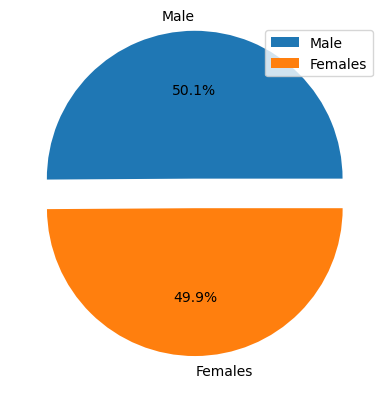

In [47]:
x = (df2['Gender']==0).sum()
y= (df2['Gender']==1).sum()
total = np.array([x, y])
print(total)
mylabels = ['Male', 'Females']
myexplode = [0.2, 0]
plt.pie(x = total, labels = mylabels, explode=myexplode, autopct='%1.1f%%')
plt.legend()
plt.show()

In [48]:
# looking at the pie chart the number of male and female customers analysed in the data set is balanced

[501 499]


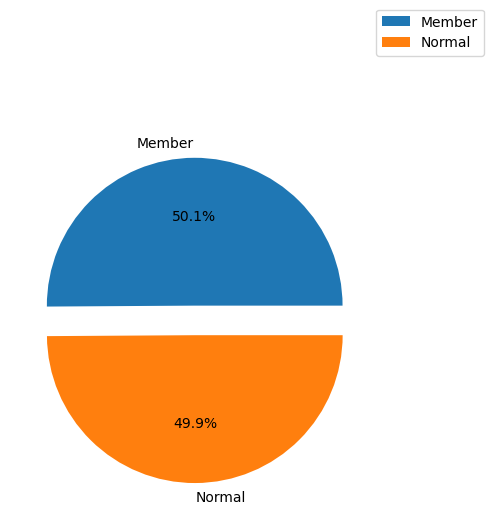

In [49]:
# visualising the customer type 
# Member = 0
# Normal = 1
x = (df2['Customer type']==0).sum()
y= (df2['Customer type']==1).sum()
total = np.array([x, y])
print(total)
mylabels = ['Member', 'Normal']
myexplode = [0.2, 0]
plt.pie(x = total, labels = mylabels, explode=myexplode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.3, 1.4))
plt.show()

In [50]:
df2['Payment'].head(2)

0    2
1    0
Name: Payment, dtype: int8

[344 311 345]


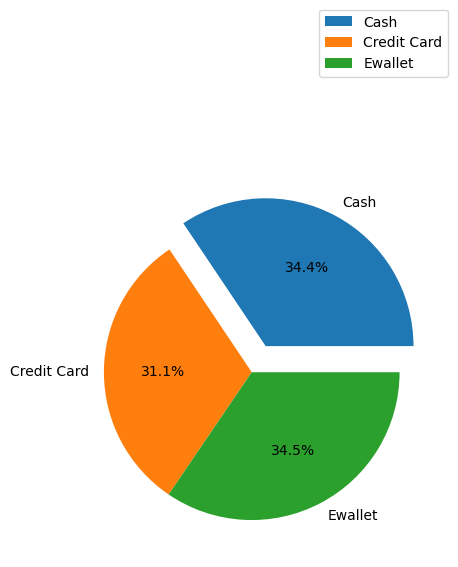

In [51]:
# visualising the customer type 
# Cash = 0
# Credit Card= 1
# Ewallet = 2
x = (df2['Payment']==0).sum()
y= (df2['Payment']==1).sum()
z = (df2['Payment']==2).sum()
total = np.array([x, y, z])
print(total)
mylabels = ['Cash', 'Credit Card', 'Ewallet']
myexplode = [0.2, 0, 0]
plt.pie(x = total, labels = mylabels, explode=myexplode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.5),loc='upper right')
plt.show()

[340 332 328]


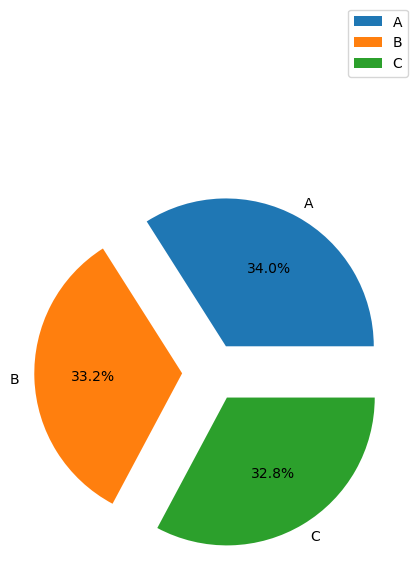

In [52]:
# visualising the Branch
# A = 0
# B = 1
# C = 2
x = (df2['Branch']==0).sum()
y= (df2['Branch']==1).sum()
z = (df2['Branch']==2).sum()
total = np.array([x, y, z])
print(total)
mylabels = ['A', 'B', 'C']
myexplode = [0.2, 0.2, 0.2]
plt.pie(x = total, labels = mylabels, explode=myexplode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.5),loc='upper right')
plt.show()

[170 178 174 152 160 166]


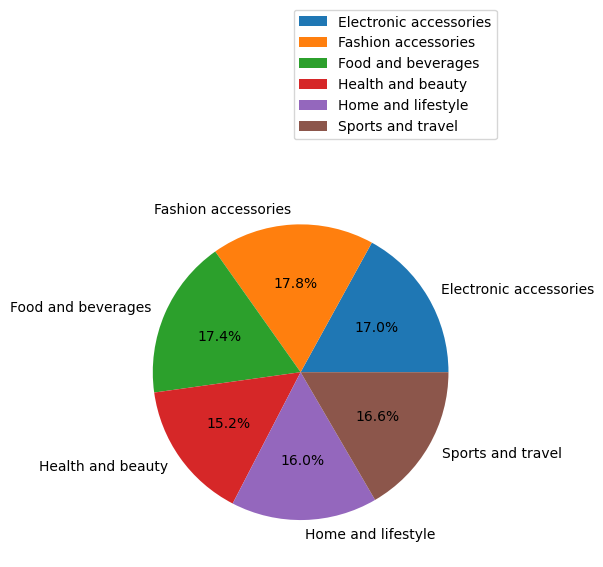

In [53]:
# visualising the Branch
# Electronic accessories = 0
#Fashion accessories = 1
# Food and beverages = 2
# Health and beauty = 3
# Home and lifestyle = 4
# Sports and travel = 5

p = (df2['Product line']==0).sum()
q = (df2['Product line']==1).sum()
r = (df2['Product line']==2).sum()
x = (df2['Product line']==3).sum()
y = (df2['Product line']==4).sum()
z = (df2['Product line']==5).sum()

total = np.array([p, q, r, x, y, z])
print(total)
mylabels = ['Electronic accessories','Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']
myexplode = [0, 0, 0, 0, 0, 0]
plt.pie(x = total, labels = mylabels, explode=myexplode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1.5),loc='upper right')
plt.show()

In [54]:
df['Product line'].head(15)

0          Health and beauty
1     Electronic accessories
2         Home and lifestyle
3          Health and beauty
4          Sports and travel
5     Electronic accessories
6     Electronic accessories
7         Home and lifestyle
8          Health and beauty
9         Food and beverages
10       Fashion accessories
11    Electronic accessories
12    Electronic accessories
13        Food and beverages
14         Health and beauty
Name: Product line, dtype: object

In [55]:
df2['Product line'].head(15)

0     3
1     0
2     4
3     3
4     5
5     0
6     0
7     4
8     3
9     2
10    1
11    0
12    0
13    2
14    3
Name: Product line, dtype: int8

In [56]:
df2['Product line'].max()

5

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

In [58]:
X = df2.drop(['Product line'], axis = 1)
y = df2.drop(['Branch', 'Invoice ID', 'Customer type', 'Gender', 'Payment', 'Date', 'Time', 'City', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [60]:
df2.groupby(['Branch'])['Customer type' , 'Product line'].mean()

Customer type  Product line
Branch                             
0            0.508824      2.538235
1            0.503012      2.503012
2            0.484756      2.310976

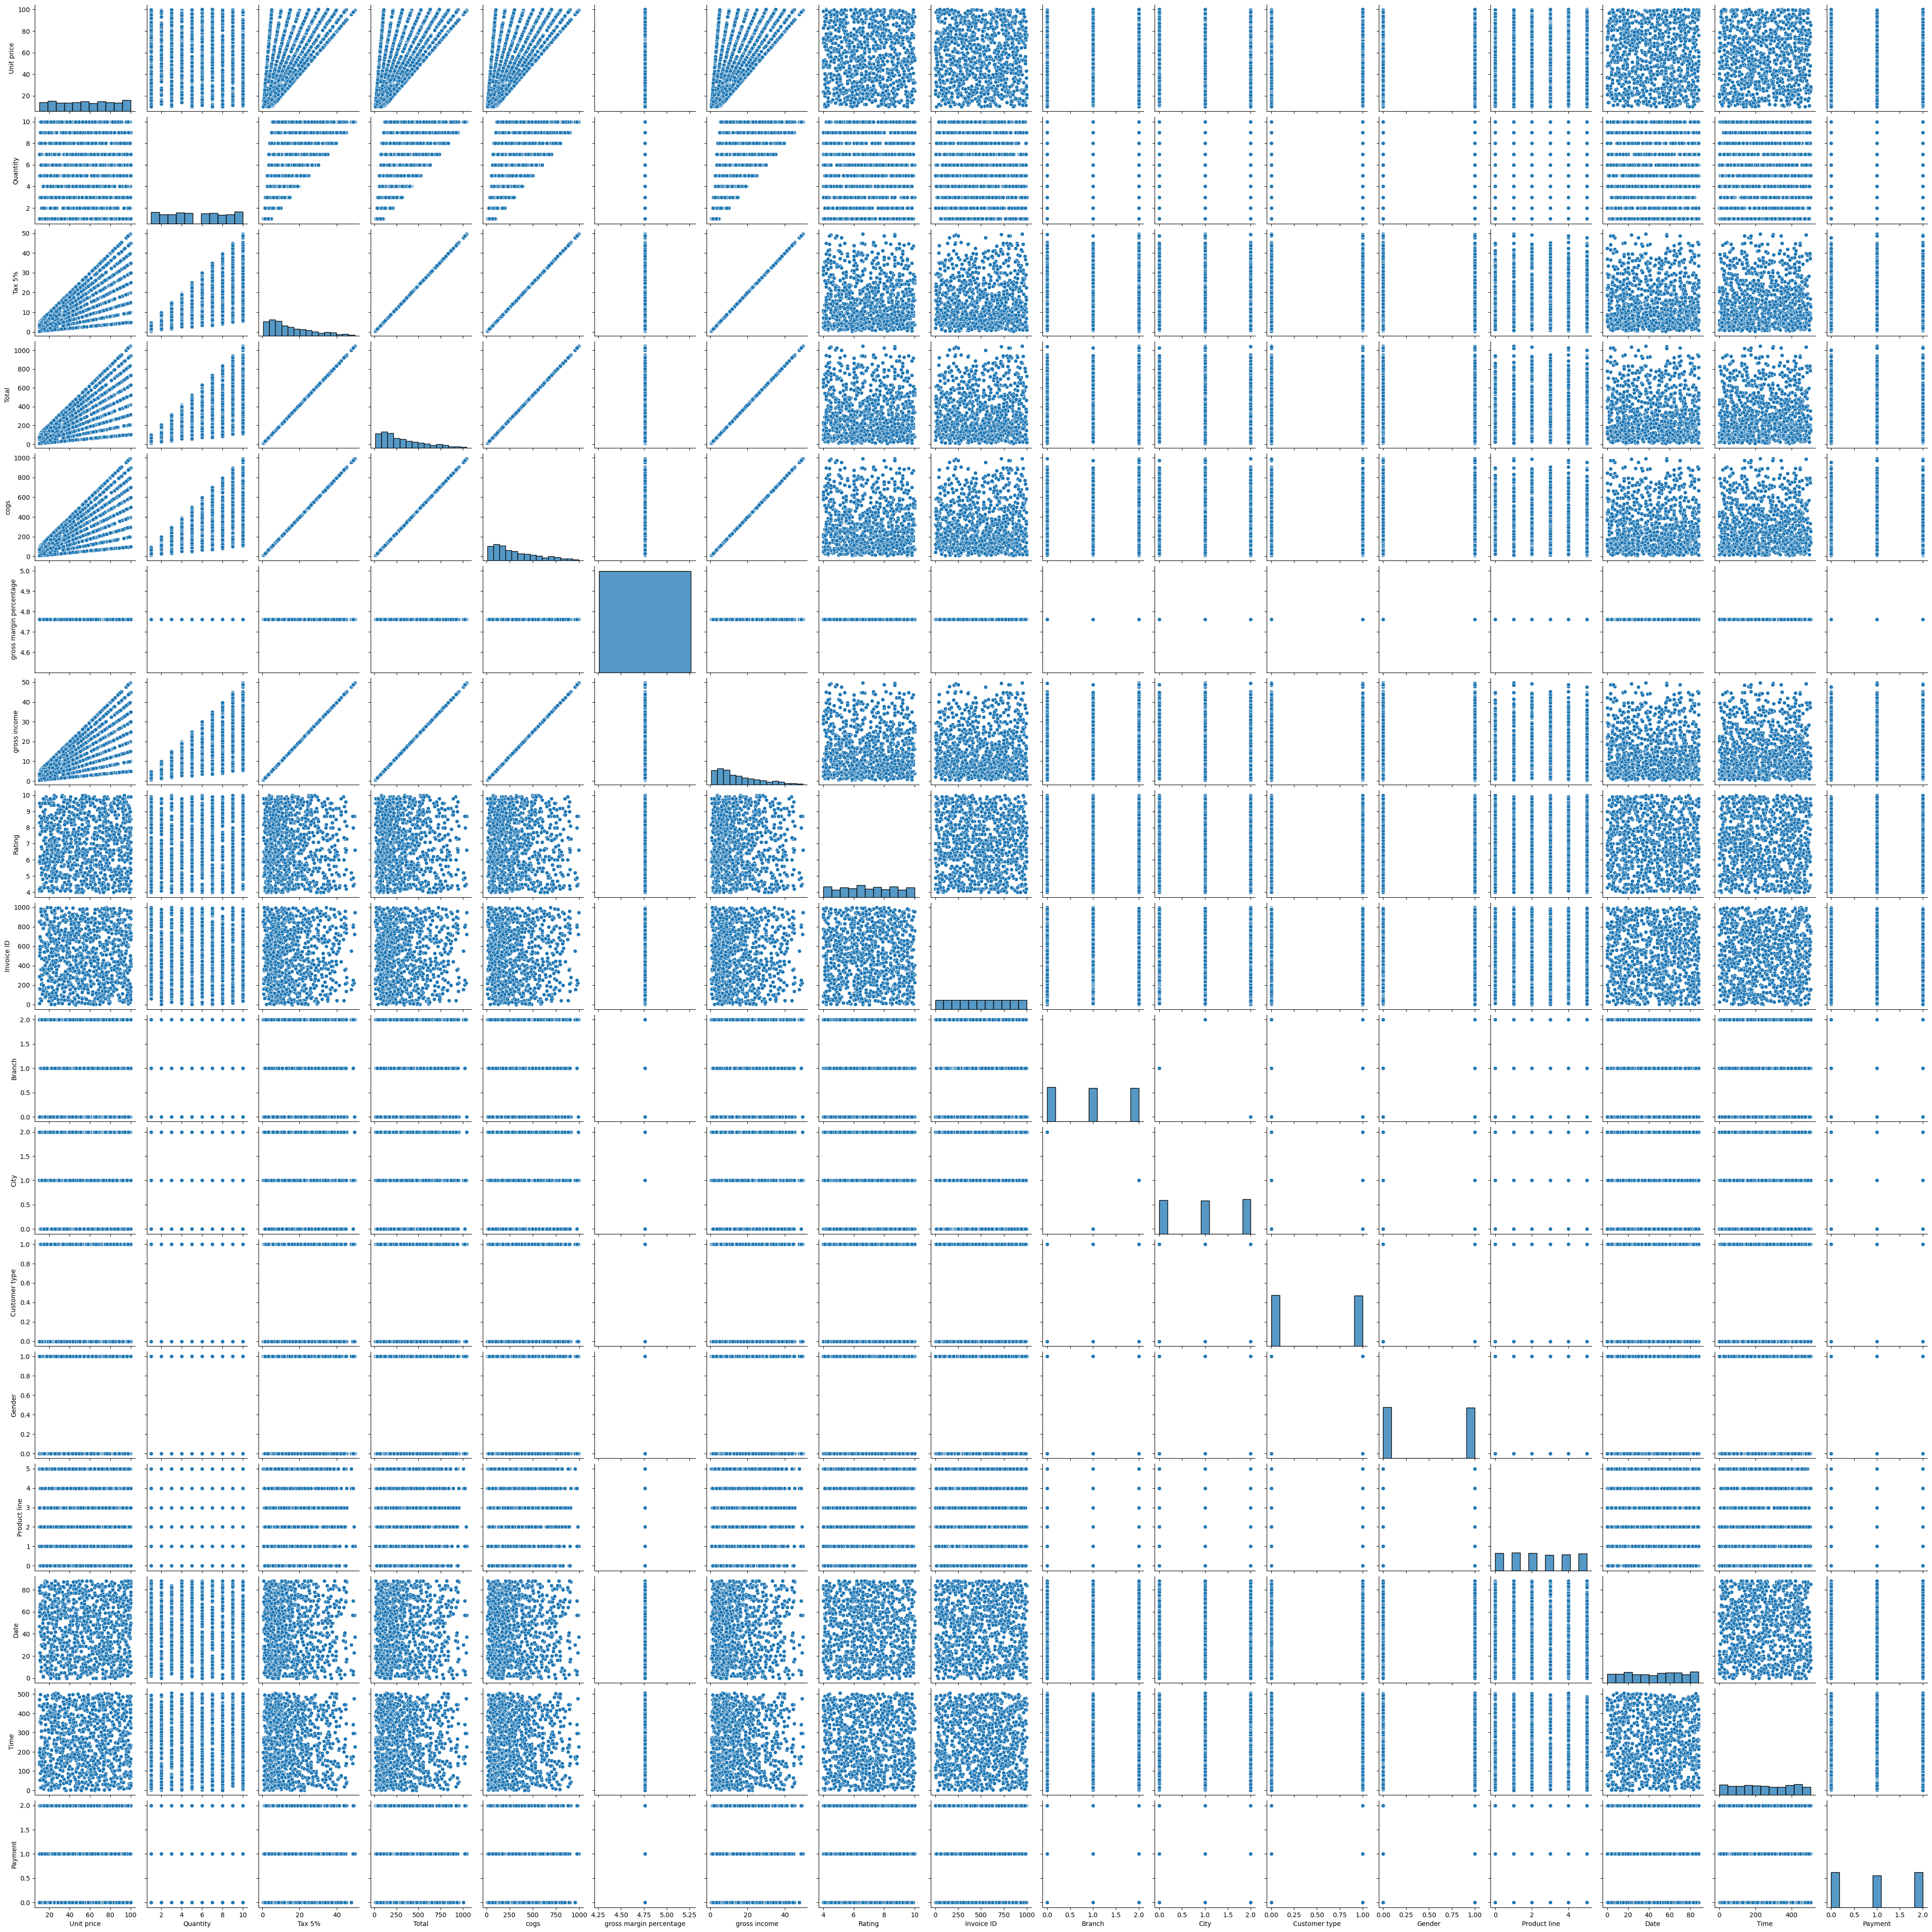

In [61]:

sns.pairplot(df2)

In [62]:

df2['Product line'].value_counts(normalize = True)

1    0.178
2    0.174
0    0.170
5    0.166
4    0.160
3    0.152
Name: Product line, dtype: float64

In [63]:
#Bivariate analysis

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

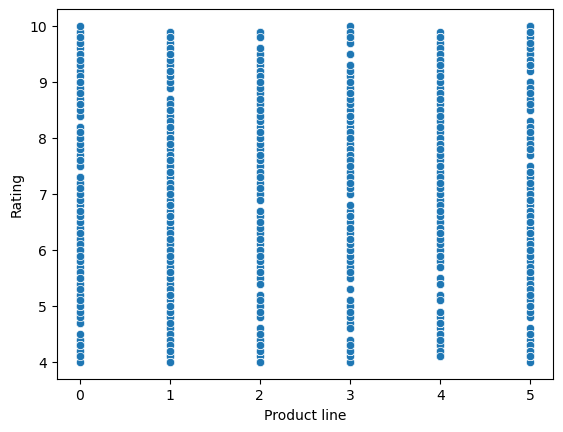

In [64]:
sns.scatterplot(data=df2, x = 'Product line', y='Rating')

<AxesSubplot:>

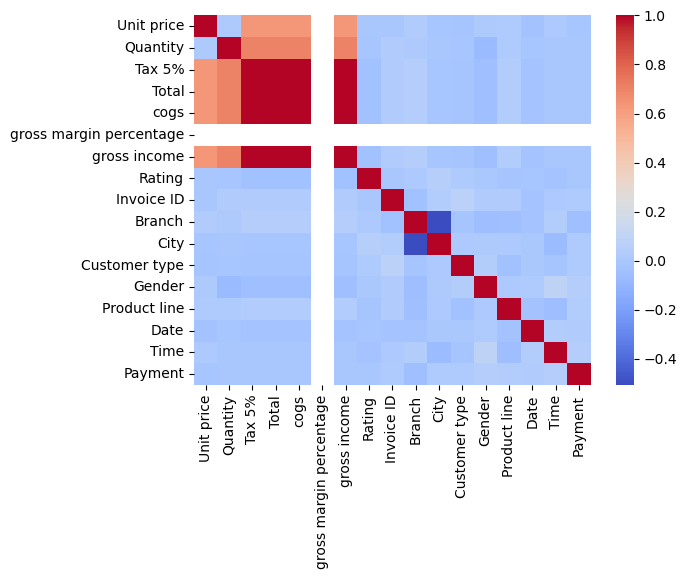

In [65]:
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')

In [66]:
#using pivot tables to inspect the distribution of payment methods 
pd.pivot_table(df, values='Payment', index=['Product line','Branch'], aggfunc='count', columns='Gender')

Gender                         Female  Male
Product line           Branch              
Electronic accessories A           28    32
                       B           28    27
                       C           28    27
Fashion accessories    A           28    23
                       B           33    29
                       C           35    30
Food and beverages     A           23    35
                       B           29    21
                       C           38    28
Health and beauty      A           21    26
                       B           20    33
                       C           23    29
Home and lifestyle     A           32    33
                       B           22    28
                       C           25    20
Sports and travel      A           29    30
                       B           30    32
                       C           29    16

In [67]:
#univariate clustering
clustering1 = KMeans(n_clusters = 6)

In [68]:
clustering1.fit(df2[['Product line']])

KMeans(n_clusters=6)

In [69]:
#Checking the clusters
# clustering1.labels_

In [70]:
df2['Product line_cluster'] = clustering1.labels_

In [71]:
df2.head(5)

Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0       74.69         7  26.1415  548.9715  522.83                 4.761905   
1       15.28         5   3.8200   80.2200   76.40                 4.761905   
2       46.33         7  16.2155  340.5255  324.31                 4.761905   
3       58.22         8  23.2880  489.0480  465.76                 4.761905   
4       86.31         7  30.2085  634.3785  604.17                 4.761905   

   gross income  Rating  Invoice ID  Branch  City  Customer type  Gender  \
0       26.1415     9.1         814       0     2              0       0   
1        3.8200     9.6         142       2     1              1       0   
2       16.2155     7.4         653       0     2              1       1   
3       23.2880     8.4          18       0     2              0       1   
4       30.2085     5.3         339       0     2              1       1   

   Product line  Date  Time  Payment  Product line_cluster  
0             3    26   146        2                     1  
1             0    87    23        0                     0  
2             4    81   155        1                     5  
3             3    19   485        2                     1  
4             5    57    29        2                     2

In [72]:
#checking the unique value counts
df2['Product line_cluster'].value_counts()

3    178
4    174
0    170
2    166
5    160
1    152
Name: Product line_cluster, dtype: int64

In [73]:
#inspecting the clustering inertia
clustering1.inertia_

1.268956721757862e-27

In [74]:
keys =[]
for key in df2.keys():
    if key != 'Customer type':
        keys.append(key)
print(keys)

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Invoice ID', 'Branch', 'City', 'Gender', 'Product line', 'Date', 'Time', 'Payment', 'Product line_cluster']


In [75]:
# Here we attempt to predict the type of customer whether they are normal customers or members
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


X = df2.drop(['Customer type', 'Invoice ID', 'Time', 'Date'], axis=1).values
y = df2.drop(keys, axis = 1).values

# splitting the features
scores = []
kf = KFold(n_splits = 10, shuffle = True)
splits = list(kf.split(X))

for train_index, test_index in splits:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

    #taking the mean of the accuracy scores    
print(np.mean(scores))    

0.496


In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y)
# print('X_train', X_train)
# print('X_test', X_test)

final_model = LogisticRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.468

In [77]:
print(confusion_matrix(y_test, y_pred))

[[63 61]
 [72 54]]


In [78]:
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.468


In [79]:
print('recall', recall_score(y_test, y_pred))

recall 0.42857142857142855


In [80]:
print('precision', precision_score(y_test, y_pred))

precision 0.46956521739130436


In [81]:
print('f1_score', f1_score(y_test, y_pred))

f1_score 0.4481327800829875


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

# make predictions
yhat = rf_model.predict(X_test)

In [83]:
# Evaluating the model's performance 
accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.456


In [84]:
print(confusion_matrix(y_test, yhat))

[[59 65]
 [71 55]]


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# make predictions
y_cap = dt_model.predict(X_test)


In [86]:
# Evaluating the model's performance 
accuracy = accuracy_score(y_test, y_cap)
print(accuracy)

0.52


In [87]:
print(confusion_matrix(y_test, y_cap))

[[63 61]
 [59 67]]
